In [1]:
%matplotlib inline
import time
import numpy as np

n = 10000
a = np.ones([n])
b = np.ones([n])

In [2]:
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.tik = None
        self.times = []
        self.start()
        
    def start(self):
        """启动计时器"""
        self.tik = time.time()
        
    def stop(self):
        """停止计时器并将时间记录在列表"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)
    
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    
    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()
        

In [3]:
c = np.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.00851 sec'

In [4]:
"""下面这个运行时间表明矢量运算要快很多"""
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

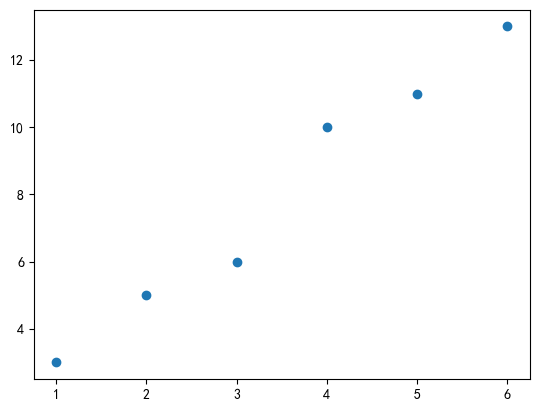

In [5]:
"""线性回归模型"""
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.family'] = 'SimHei' # 在matplotlib图中添加中文支持

"""特征、标签定义"""
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3, 5, 6, 10, 11, 13])
m = len(x) # 样本数量

plt.autoscale(enable=True, axis='both', tight=None) # 自动缩放坐标轴
plt.scatter(x, y)
plt.show()

In [6]:
"""设定初始参数值，f(x)=wx+b"""
w = 0.0
b = 0.0
learning_rate = 0.01
num_iterations = 1000

In [7]:
"""定义损失函数（平方误差）"""
def compute_loss(w, b, x, y):
    predictions = np.dot(x, w) + b # 这里其实也可以直接按照标量的乘法来，对于简单的线性回归来说不必按照张量的形式。
    errors = y - predictions
    squared_errors = np.square(errors)
    loss = np.sum(squared_errors) / (2 * m)
    return loss

In [8]:
"""梯度下降（检验梯度下降学习曲线）"""
def gradient_descent(w, b, x, y, learning_rate, num_iterations):
    loss_history = []
    for _ in range(num_iterations):
        predictions = np.dot(x, w) + b # 和上面一样，可以变为标量的乘积求和运算。
        dw = (1 / m) * np.dot(x.T, predictions - y)
        db = (1 / m) * np.sum(predictions - y)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        loss = compute_loss(w, b, x, y)
        loss_history.append(loss)
    return w, b, loss_history

最优的权重 w = 2.06853581623761
最优的偏置 b = 0.7512244806159183


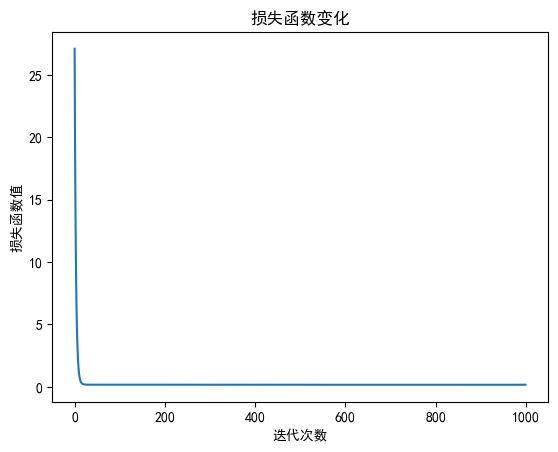

In [9]:
"""模型训练"""
final_w, final_b, loss_history = gradient_descent(w, b, x, y, learning_rate, num_iterations)

print(f"最优的权重 w = {final_w}")
print(f"最优的偏置 b = {final_b}")

plt.plot(loss_history)
plt.title('损失函数变化')
plt.xlabel('迭代次数')
plt.ylabel('损失函数值')
plt.show()

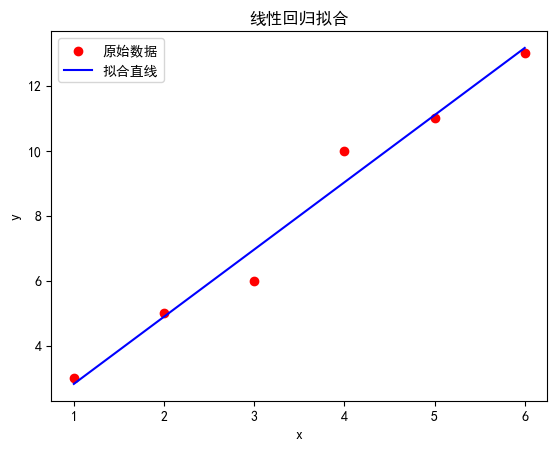

In [10]:
"""拟合曲线"""
plt.scatter(x, y, color='red', label='原始数据')
plt.plot(x, final_w * x + final_b, color='blue', label="拟合直线")
plt.xlabel('x')
plt.ylabel('y')
plt.title('线性回归拟合')
plt.legend()
plt.show()

In [11]:
"""scikit-learn库实现线性回归"""
"""简单线性回归"""
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = [[1], [2], [3], [4], [5], [6]]
y = [3, 5, 7, 9, 11, 13]
model.fit(x, y)

LinearRegression()

In [12]:
x_new = [[7], [8]]
predictions = model.predict(x_new)
print(predictions)

[15. 17.]


In [13]:
print("截距:", model.intercept_)
print("系数:", model.coef_)

截距: 1.0
系数: [2.]


In [14]:
"""多元线性回归"""

X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6]])

"""假设 y = x1 + 2*x2 + 1"""
y = np.array([1*1 + 2*2 + 1,
              1*2 + 2*3 + 1,
              1*3 + 2*4 + 1,
              1*4 + 2*5 + 1,
              1*5 + 2*6 + 1])

model = LinearRegression()
model.fit(X, y)

# 计算预测值
y_pred = model.predict(X)

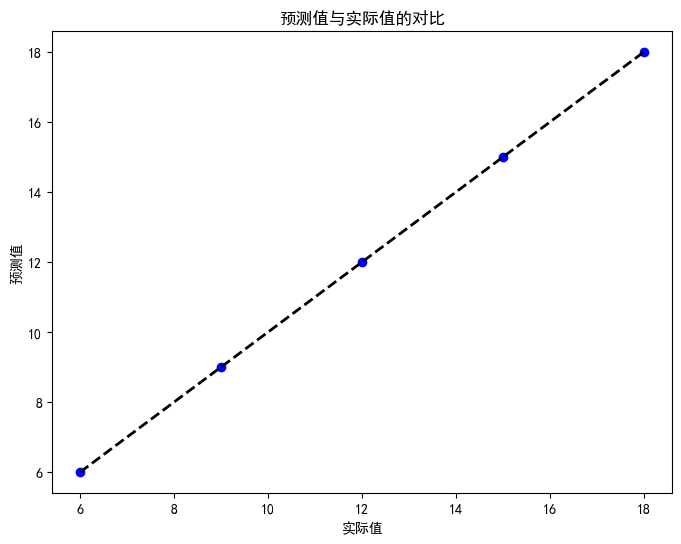

In [15]:
# 绘制实际值与预测值的对比
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 绘制对角线
plt.xlabel('实际值')
plt.ylabel('预测值')
plt.title('预测值与实际值的对比')
plt.show()

D:\Anaconda3\envs\DL\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


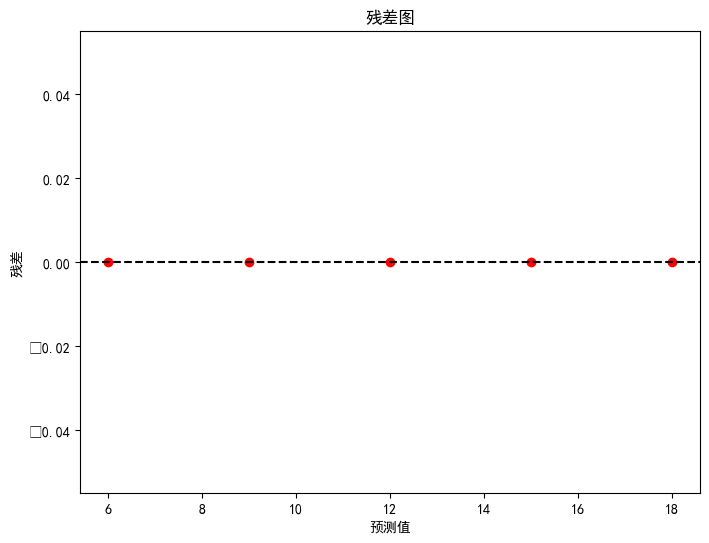

In [16]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.title('残差图')
plt.show()

Epoch [10/100], Loss: 0.0417
Epoch [20/100], Loss: 0.0219
Epoch [30/100], Loss: 0.0153
Epoch [40/100], Loss: 0.0120
Epoch [50/100], Loss: 0.0099
Epoch [60/100], Loss: 0.0086
Epoch [70/100], Loss: 0.0075
Epoch [80/100], Loss: 0.0068
Epoch [90/100], Loss: 0.0062
Epoch [100/100], Loss: 0.0057
Test Accuracy: 100.00%


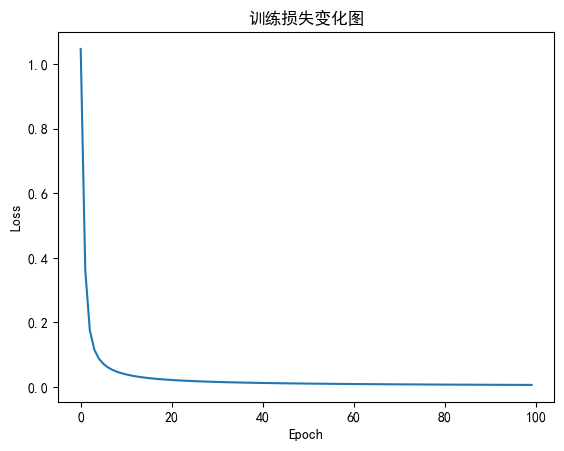

D:\Anaconda3\envs\DL\Lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4316.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
D:\Anaconda3\envs\DL\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


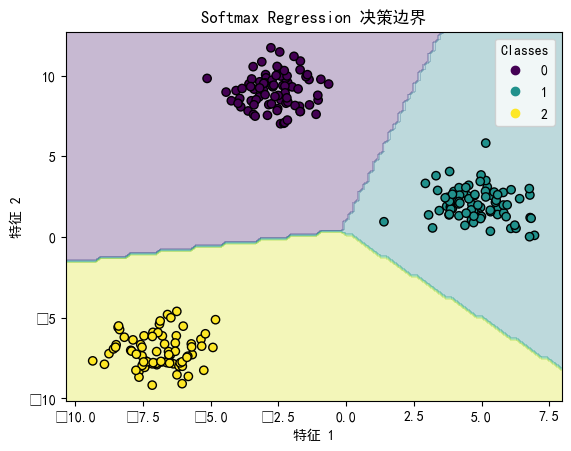

In [17]:
"""softmax回归（多类逻辑回归）"""
"""主要是解决多分类问题，依旧是线性模型，f(x)=wx+b，将输入特征的线性组合映射为概率分布，输出每个类别的预测概率（选最大的）；采用的交叉熵损失。"""
"""y = softmax(x), y_i = e^{f(x)_i} / sum(e^{f(x)_i})"""
"""pytorch实现"""
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成三分类数据集
def generate_data(n_samples=300, n_classes=3, random_state=42):
    x, y = make_blobs(
        n_samples=n_samples, # 样本数
        centers=n_classes,  # 类别数
        n_features=2,  # 2D特征方便可视化
        random_state=random_state # 随机种子方便可复现（随便设置多少没关系）
    )
    x = torch.tensor(x, dtype=torch.float32) # 张量化数据集
    y = torch.tensor(y, dtype=torch.long)  # 类别标签为整数索引
    return x, y

# 生成并划分数据集
X, y = generate_data()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # 测试集占2成，训练集占8成
)

# 定义Softmax回归模型
class SoftmaxRegression(nn.Module):
    def __init__(self, input_dim, output_dim): # 特征维度和分类类别数
        super().__init__() # 使用PyTorch的nn.Module初始化方法的必须操作
        self.linear = nn.Linear(input_dim, output_dim)  # 无隐藏层的线性层

    def forward(self, x):
        return self.linear(x)  # 输出未归一化的线性输出（softmax的原始分数）

# 初始化模型
input_dim = 2  # 输入特征维度
output_dim = 3  # 类别数
model = SoftmaxRegression(input_dim, output_dim)

# 3. 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熵损失，内部自动结合Softmax
optimizer = optim.SGD(model.parameters(), lr=0.1) # 随机梯度下降法，lr为学习率

# 4. 训练函数
def train(model, X_train, y_train, epochs=100):
    losses = [] # 损失
    for epoch in range(epochs):
        # 前向传播
        outputs = model(X_train)
        loss = criterion(outputs, y_train) # 损失计算
        
        # 反向传播
        optimizer.zero_grad() # PyTorch 每轮默认会积累梯度，所以每轮需要手动梯度清零重新计算。
        loss.backward() # 反向传播计算所有参数的梯度
        optimizer.step() # 更新参数
        
        losses.append(loss.item())
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    return losses

# 训练模型
losses = train(model, X_train, y_train, epochs=100)

# 5. 评估函数
def evaluate(model, X_test, y_test):
    with torch.no_grad(): # 测试评估不用更新参数就禁用梯度
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)  # 取概率最大的类别
        acc = accuracy_score(y_test, predicted)
        print(f'Test Accuracy: {acc * 100:.2f}%')
    return predicted

# 评估模型
predicted = evaluate(model, X_test, y_test)

# 6. 可视化结果
def plot_results(X, y, model, title):
    # 创建网格点
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = torch.meshgrid(
        torch.linspace(x_min, x_max, 100),
        torch.linspace(y_min, y_max, 100)
    )
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    
    # 预测网格点类别
    with torch.no_grad():
        outputs = model(grid)
        _, predictions = torch.max(outputs, 1)
        z = predictions.reshape(xx.shape)
    
    # 绘制决策边界和数据点
    plt.contourf(xx, yy, z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.title(title)
    plt.xlabel('特征 1')
    plt.ylabel('特征 2')
    plt.legend(*scatter.legend_elements(), title='Classes')
    plt.show()

# 绘制训练损失曲线
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('训练损失变化图')
plt.show()

# 绘制决策边界
plot_results(X_train, y_train, model, 'Softmax Regression 决策边界')